## Dataset Diabetes

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir si un paciente tiene o no diabetes, basándose en ciertas medidas diagnósticas incluidas en el conjunto de datos. Se impusieron varias restricciones en la selección de estas instancias de una base de datos más grande. En particular, todos los pacientes aquí son mujeres mayores de 21 años de herencia india Pima.

### Cargar los datos

Abrir el archivo `diabetes.csv` en la carpeta `1_datos`. Analizar su estructura y responder las siguientes preguntas:

*   ¿Cuántas instancias o ejemplos tiene el dataset?
*   ¿Cómo se llama la variable de salida o target? ¿Qué tipo de datos es?
*   ¿Cuántos atributos posee cada instancia o ejemplo?¿Puede detectar datos faltantes o mal registrados en algún atributo?
*   ¿Qué tipo de dato tiene cada atributo?

1) El dataset tiene 768 instancias.

2) La variable de salida se llama "Outcome". Es una variable categorica binaria, donde 1 indica que la persona tiene diabetes y 0 indica que no la tiene. Este tipo de datos es del tipo int.

3) Cada instancia tiene 9 atributos, más la columna "Outcome", lo que hace un total de 10 columnas (sin contar la columna Unnamed: 0 porque no se que significa, parece un tipo indice)
Si, en los atributos BloodPressure, SkinThickness, Insulin y BMI.

4) regnancies: int
Glucose: int
BloodPressure: int
SkinThickness: int
Insulin: int
BMI: float
DiabetesPedigreeFunction: float
Age: int
Outcome: int

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


In [18]:
datos = pd.read_csv('./1_datos/diabetes.csv')
datos


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72.0,35.0,0.0,33.6,0.627,50,1
1,1,1,85,66.0,29.0,0.0,26.6,0.351,31,0
2,2,8,183,64.0,0.0,0.0,23.3,0.672,32,1
3,3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,4,0,137,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
763,763,10,101,76.0,48.0,180.0,32.9,0.171,63,0
764,764,2,122,70.0,27.0,0.0,36.8,0.340,27,0
765,765,5,121,72.0,23.0,112.0,26.2,0.245,30,0
766,766,1,126,60.0,0.0,0.0,30.1,0.349,47,1


In [19]:
datos= datos.drop(columns="Unnamed: 0") #Borro Unnamed: 0 ya que solo parece ser un ID
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             767 non-null    float64
 3   SkinThickness             756 non-null    float64
 4   Insulin                   763 non-null    float64
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [20]:
faltante = datos.isna().sum() #si hay NA los sume, basicamente un ftable de R
print(faltante,"\n")

datos_faltantes = datos[datos.isnull().any(axis=1)]
datos_faltantes.head() #Algunos datos faltantes

Pregnancies                  0
Glucose                      0
BloodPressure                1
SkinThickness               12
Insulin                      5
BMI                          1
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64 



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,NaN,NaN,NaN,35.3,0.134,29,0
9,8,125,96.0,NaN,NaN,NaN,0.232,54,1
10,4,110,92.0,NaN,NaN,37.6,0.191,30,0
11,10,168,74.0,NaN,NaN,38.0,0.537,34,1
12,10,139,80.0,NaN,NaN,27.1,1.441,57,0


### Detección de valores atípicos y tratamiento de datos faltantes

- Analice con cuidado el rango de valores de los atributos. **¿Nota valores atípicos a simple vista en algún/algunos de los atributos?**

    -  Ejemplo: Un valor de insulina igual a 0 puede considerarse mal registrado o faltante.

- Los valores atípicos que detecte pueden considerarse datos faltantes. Utilice el método [replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) de pandas para reemplazarlos por np.NaN.

In [21]:
datos["BMI"].sort_values().head(11)

49      0.0
371     0.0
706     0.0
60      0.0
684     0.0
426     0.0
81      0.0
494     0.0
145     0.0
522     0.0
438    18.2
Name: BMI, dtype: float64

In [22]:
#Reemplazamos los valores por np.NaN 
datos.replace({"SkinThickness":0}, np.nan, inplace=True) # cambio "np.NaN" "a "np.nan" porque: `np.NaN` was removed in the NumPy 2.0 release.
datos.replace({"BMI":0}, np.nan, inplace=True)
datos.replace({"Insulin":0}, np.nan, inplace=True)
datos.replace({"BloodPressure":0}, np.nan, inplace=True) 
# Revisar los primeros datos para confirmar los cambios
datos.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35.0,168.0,43.1,2.288,33,1


Después de realizar el reemplazo, ¿Cuántos datos faltantes presenta cada atributo?

In [23]:
X = datos.drop(columns="Outcome")
y= datos["Outcome"]

data_perdida = datos.isna().sum()
print(data_perdida)

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


### ⚠️
Antes de realizar cualquier procesamiento, no olvide de separar los datos en entrenamiento y prueba. Divida el conjunto de datos en entrenamiento y prueba utilizando train_test_split (con una proporción de 80% entrenamiento y 20% prueba) use 42 como semilla.

### Aclaración sobre la imputación de datos faltantes
Algo a tener en cuenta al momento de imputar datos faltantes es que los atributos pueden tener distribuciones diferentes según la salida o target (con diabetes/sin diabetes). Por ejemplo, una persona sana tendrá un valor de insulina en un rango distinto a una persona con diabetes.

- Implemente un transformer para imputar datos faltantes de forma condicional, dependiendo de la clase (diabetes/no diabetes). Para hacerlo, utilice la media o mediana correspondiente a cada clase.
- Utilice un Pipeline de scikit-learn para realizar la preparación completa de los datos, que incluya la imputación.

In [29]:
class ConditionalImputer(BaseEstimator, TransformerMixin): #Clase para imputar valores faltantes
    def __init__(self, strategy='mean'): #Constructor de la clase 
        self.strategy = strategy

    def fit(self, X, y): #Metodo para ajustar el modelo
        self.statistics_ = {}
        for cls in np.unique(y):
            if self.strategy == 'mean':
                self.statistics_[cls] = round(X[y == cls].mean(), 3)
            elif self.strategy == 'median':
                self.statistics_[cls] = X[y == cls].median()
        return self
    def mostrar (self):
        print(self.statistics_)
        
    def transform(self, X): #Metodo para transformar los datos
        X_transformed = X.copy() #Copia de los datos
        for cls, stats in self.statistics_.items(): #Iteramos sobre las clases y las estadisticas
            mask = (y == cls) 
            for col in X.columns: #Iteramos sobre las columnas
                X_transformed.loc[mask & X[col].isnull(), col] = stats[col] #Imputamos los valores faltantes
        return X_transformed

In [31]:
# Ejemplo de uso con un Pipeline
from sklearn.model_selection import train_test_split

pipeline = Pipeline([
    ('imputer', ConditionalImputer(strategy='mean'))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipeline.fit(X_train, y_train)
X_train_transformed = pipeline.transform(X_train)
X_test_transformed = pipeline.transform(X_test)

print("Datos de entrenamiento transformados:")
print(X_train_transformed)
print("Datos de prueba transformados:")
print(X_test_transformed)

Datos de entrenamiento transformados:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
353          1.0     90.0           62.0         12.000   43.000  27.2   
711          5.0    126.0           78.0         27.000   22.000  29.6   
373          2.0    105.0           58.0         40.000   94.000  34.9   
46           1.0    146.0           56.0         26.973  122.302  29.7   
682          0.0     95.0           64.0         39.000  105.000  44.6   
..           ...      ...            ...            ...      ...   ...   
451          2.0    134.0           70.0         33.204  201.890  28.9   
113          4.0     76.0           62.0         26.973  122.302  34.0   
556          1.0     97.0           70.0         40.000  122.302  38.1   
667         10.0    111.0           70.0         27.000  201.890  27.5   
107          4.0    144.0           58.0         28.000  140.000  29.5   

     DiabetesPedigreeFunction   Age  
353                     0.580  24.0

C:\Users\Axel\AppData\Local\Temp\ipykernel_31596\3284984616.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.315' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_transformed.loc[mask & X[col].isnull(), col] = stats[col] #Imputamos los valores faltantes
C:\Users\Axel\AppData\Local\Temp\ipykernel_31596\3284984616.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '109.852' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_transformed.loc[mask & X[col].isnull(), col] = stats[col] #Imputamos los valores faltantes
C:\Users\Axel\AppData\Local\Temp\ipykernel_31596\3284984616.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '31.285' has dtype incompatible w

In [32]:
pipeline.named_steps['imputer'].mostrar()

{np.int64(0): Pregnancies                   3.315
Glucose                     109.852
BloodPressure                70.448
SkinThickness                26.973
Insulin                     122.302
BMI                          30.780
DiabetesPedigreeFunction      0.438
Age                          31.285
dtype: float64, np.int64(1): Pregnancies                   4.762
Glucose                     141.575
BloodPressure                75.389
SkinThickness                33.204
Insulin                     201.890
BMI                          35.542
DiabetesPedigreeFunction      0.552
Age                          37.257
dtype: float64}



- Entrene al menos tres clasificadores distintos.
- Compare el desempeño de los modelos utilizando la métrica F1-score, ya que el dataset tiene un desbalance de clases (más casos sin diabetes que con diabetes). Puede evaluar otras métricas si lo desea. [sklearn metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

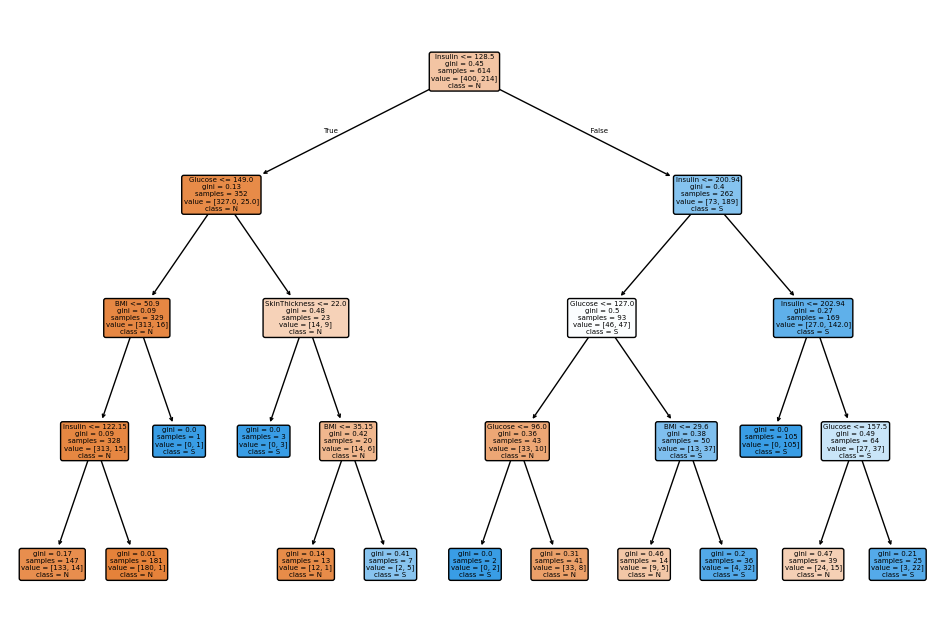

In [46]:
#arbol de decision
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score

arbol = DecisionTreeClassifier(random_state=42, max_depth=4)
arbol.fit(X_train_transformed, y_train)

plt.figure(figsize=(12,8))
plot_tree(arbol, filled=True, feature_names=X.columns, class_names=['N', 'S'], rounded=True, proportion=False, precision=2)
plt.show()

In [47]:
predicciones_arbol = arbol.predict(X_test_transformed)
f1_score(y_test, predicciones_arbol)

np.float64(0.78)

In [48]:
#clasificador svm
from sklearn.svm import SVC

svm = SVC(random_state=42)
svm.fit(X_train_transformed, y_train)

predicciones_svm = svm.predict(X_test_transformed)
f1_score(y_test, predicciones_svm)

np.float64(0.7747747747747747)